# Introduction to Financial Forecasting with Python

Welcome to our session on financial forecasting using Python! In this module, we'll dive into the fascinating world of time series analysis and prediction. We'll start by exploring a basic forecasting model using synthetic data to understand the fundamentals of time series forecasting. This will set the foundation for more complex analyses that you'll encounter in real-world financial data.

## The Original Code: A Starting Point
We begin with a Python script that generates synthetic financial data. This data simulates a simple financial time series with a linear trend and some random noise, mimicking a basic scenario in financial forecasting. We'll use this data to:

- Understand the structure of time series data.
- Learn how to split data appropriately for time series forecasting.
- Explore the application of linear regression in a time series context.
- Visualize and evaluate the performance of our forecasting model.

## Upcoming Assignment
After familiarizing yourselves with the original code, you will be tasked with an assignment that builds on these concepts. You'll apply your skills to real financial data, where you will:

- Engage in more complex feature engineering.
- Experiment with different forecasting models.
- Analyze and compare the performance of your models.

The details of the assignment will be provided later in this Jupyter Notebook. This will be your opportunity to apply the concepts learned in a more realistic and challenging setting.

So, let's get started with the original code and begin our journey into the world of financial forecasting!


In [1]:
!pip install pmdarima

# Paul's Code:

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Generate synthetic financial data with a trend
np.random.seed(42)
n_points = 100
time = np.arange(n_points)
trend = 0.5 * time + np.random.normal(scale=5, size=n_points)
financial_data = pd.DataFrame({'Time': time, 'Trend': trend})

print(financial_data.head(10))

   Time      Trend
0     0   2.483571
1     1  -0.191322
2     2   4.238443
3     3   9.115149
4     4   0.829233
5     5   1.329315
6     6  10.896064
7     7   7.337174
8     8   1.652628
9     9   7.212800


Mean Absolute Error (MAE): 2.73
Mean Squared Error (MSE): 11.42
Root Mean Squared Error (RMSE): 3.38


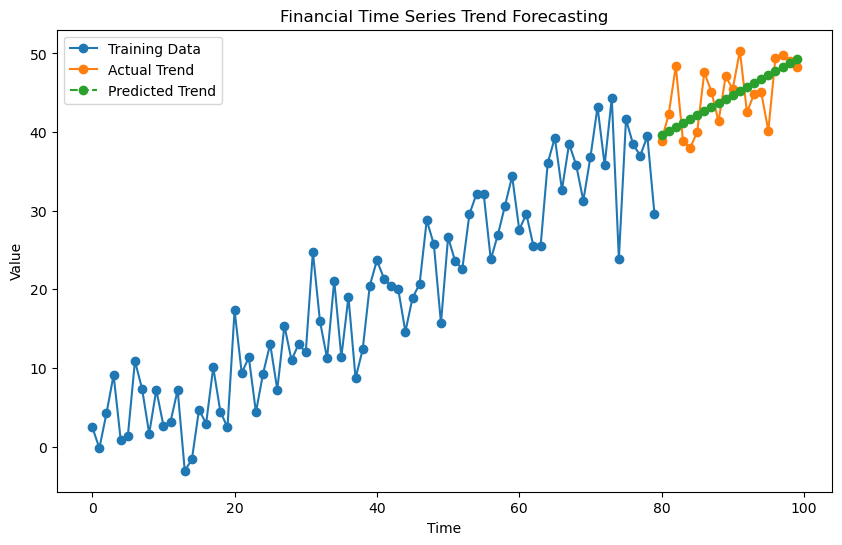

D:\Anaconda\envs\Homl\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
D:\Anaconda\envs\Homl\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
D:\Anaconda\envs\Homl\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
D:\Anaconda\envs\Homl\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
D:\Anaconda\envs\Homl\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
D:\Anaconda\envs\Homl\lib

Mean Absolute Error (MAE): 3.64
Mean Squared Error (MSE): 21.54
Root Mean Squared Error (RMSE): 4.64


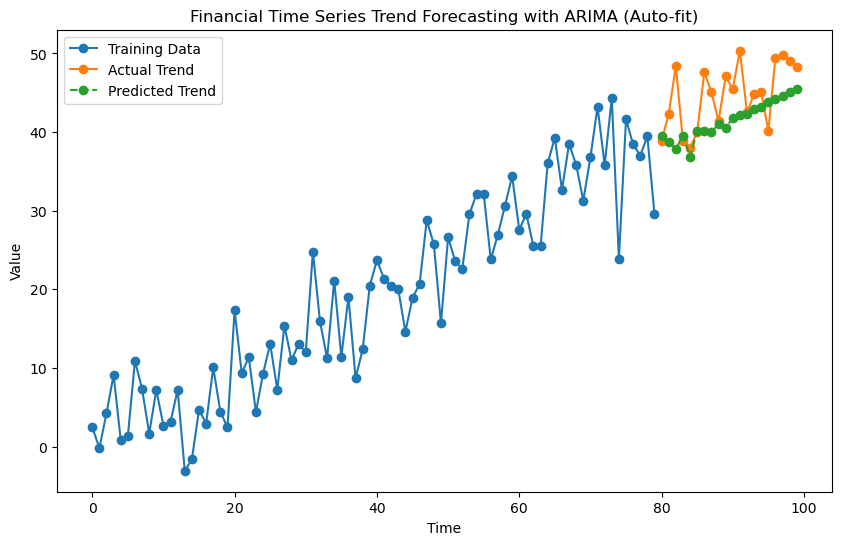

In [13]:


# Split the data into training and testing sets
train_size = int(0.8 * n_points)
train_data = financial_data.head(train_size).copy()
test_data = financial_data.tail(n_points - train_size).copy()

# Fit a linear regression model
model = LinearRegression()
model.fit(train_data[['Time']], train_data['Trend'])

# Predict the trend for the test set
test_data['Trend_Predicted'] = model.predict(test_data[['Time']])

# Calculate performance metrics
mae = mean_absolute_error(test_data['Trend'], test_data['Trend_Predicted'])
mse = mean_squared_error(test_data['Trend'], test_data['Trend_Predicted'])
rmse = np.sqrt(mse)

# Print performance metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Plot the actual and predicted trends
plt.figure(figsize=(10, 6))
plt.plot(train_data['Time'], train_data['Trend'], label='Training Data', marker='o')
plt.plot(test_data['Time'], test_data['Trend'], label='Actual Trend', marker='o')
plt.plot(test_data['Time'], test_data['Trend_Predicted'], label='Predicted Trend', linestyle='--', marker='o')
plt.title('Financial Time Series Trend Forecasting')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

# Auto-fit ARIMA model
auto_model = auto_arima(train_data['Trend'], seasonal=False, suppress_warnings=True)
fit_model = auto_model.fit(train_data['Trend'])

# Forecast the trend for the test set
forecast = fit_model.predict(n_periods=len(test_data))

# Calculate performance metrics
mae = mean_absolute_error(test_data['Trend'], forecast)
mse = mean_squared_error(test_data['Trend'], forecast)
rmse = np.sqrt(mse)

# Print performance metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Plot the actual and predicted trends
plt.figure(figsize=(10, 6))
plt.plot(train_data['Time'], train_data['Trend'], label='Training Data', marker='o')
plt.plot(test_data['Time'], test_data['Trend'], label='Actual Trend', marker='o')
plt.plot(test_data['Time'], forecast, label='Predicted Trend', linestyle='--', marker='o')
plt.title('Financial Time Series Trend Forecasting with ARIMA (Auto-fit)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

# Financial Forecasting in Python: Code Summary

## Overview
This code is a hands-on introduction to financial forecasting using Python. We generate synthetic financial data and apply two different forecasting models: Linear Regression and ARIMA. The goal is to predict future trends based on historical data.

## Key Components

### 1. Data Generation and Preprocessing
- We start by creating synthetic financial data. This approach is great for learning as it avoids the complexities of real-world data.
- The dataset is divided into two parts: training data for building our models and testing data for evaluating them.

### 2. Linear Regression Model
- First, we use a simple linear regression model. It's a basic yet powerful tool for trend forecasting.
- After fitting the model to the training data, we make predictions for the test data.
- We calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) to assess the model's accuracy.

### 3. ARIMA Model
- Next, we explore the ARIMA model, a more advanced method for time series forecasting.
- `auto_arima` helps us automatically find the best parameters for the ARIMA model.
- Like with linear regression, we evaluate the ARIMA model's performance using MAE, MSE, and RMSE.

### 4. Visualization
- We plot the actual and predicted trends for both models. This visual representation helps us understand how well our models are performing.
- By comparing these plots, you can visually assess the accuracy of each model.


## Conclusion
This code is a stepping stone into the world of financial forecasting. It provides a balance between theory and practice, making it suitable for all of you, regardless of your experience level in data science.

Remember, the key to learning data science is experimentation and curiosity. So, dive in, tweak the code, and see what insights you can uncover!


# Time Series Analysis Assignment: Predicting Stock Prices

## Core Assignment (100 points total)

### Setup and Data Acquisition (0 points)
```python
# Install yfinance package
!pip install yfinance

# Import yfinance and download Apple Inc. stock data
import yfinance as yf
stock_data = yf.download('AAPL', start='2022-01-01', end='2024-01-01')
```

### Objective:
Students will utilize provided financial data to construct predictive models using linear regression and exponential smoothing. They will then assess the models' performance using various metrics.

### Instructions and Point Breakdown:

- **Model Building (40 points)**
  - Implement linear regression using the rolling averages as features. (20 points)
  - Create an Exponential Smoothing model that accounts for trend and seasonality. (20 points)

- **Performance Metrics (20 points)**
  - Calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) for each model.
  - Provide commentary on the performance of each model based on these metrics.

- **Model Comparison and Interpretation (40 points)**
  - Compare the forecasted values against the actual values in the test set visually using a plot. (10 points)
  - Interpret the results of each model and discuss any potential reasons for differences in performance. (15 points)
  - Discuss the implications of model performance for real-world decision-making in finance. (15 points)

In [7]:
!pip install yfinance

     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 3.0/3.0 MB 58.8 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 1.4/1.4 MB 74.1 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.18.1-py3-none-any.whl size=139099 sha256=78ad1c9c6c07ecb18512a48bde3c620e47551453af8a3876e50d3d6810930b7f
  Stored in directory: c:\users\aaron\appdata\local\pip\cache\wheels\8d\c2\af\d591c26196f80ecdedb79664b51642ff1cf49af64d5cd69999
Successfully built peewee


In [15]:
import yfinance as yf
stock_data = yf.download('AAPL', start='2022-01-01', end='2024-01-01')
stock_data.columns = [col[0] for col in stock_data.columns]

[*********************100%***********************]  1 of 1 completed


In [17]:
n_points = len(stock_data)
stock_data.head()

,Close,High,Low,Open,Volume
Date,,,,,
2022-01-03,178.645691,179.499620,174.425185,174.542962,104487900
2022-01-04,176.378342,179.558457,175.809061,179.254190,99310400
2022-01-05,171.686691,176.839648,171.411868,176.290001,94537600
2022-01-06,168.820694,172.059699,168.467348,169.507752,96904000
2022-01-07,168.987549,170.921136,167.868622,169.694241,86709100


Mean Absolute Error (MAE): 2.62
Mean Squared Error (MSE): 10.00
Root Mean Squared Error (RMSE): 3.16


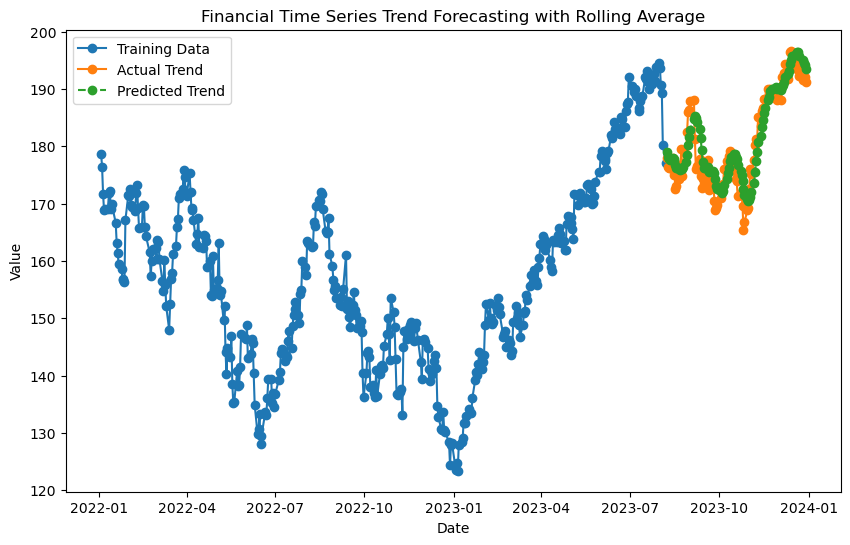

In [21]:
# define training and test sets
train_size = int(0.8 * n_points)
train_data = stock_data.head(train_size).copy()
test_data = stock_data.tail(n_points - train_size).copy()

# If Date is an index, reset it to make it a column
if 'Date' not in train_data.columns and train_data.index.name == 'Date':
    train_data = train_data.reset_index()
    test_data = test_data.reset_index()

# Convert Date to numerical format for regression
if isinstance(train_data['Date'].iloc[0], (pd.Timestamp, np.datetime64)):
    train_data['Date_Numeric'] = train_data['Date'].astype(np.int64) // 10**9
    test_data['Date_Numeric'] = test_data['Date'].astype(np.int64) // 10**9
else:
    train_data['Date_Numeric'] = train_data['Date']
    test_data['Date_Numeric'] = test_data['Date']

# Calculate rolling average using a 7-day window
train_data['Rolling_Avg_7d'] = train_data['Close'].rolling(window=7, min_periods=1).mean()

# Add the same calculation for test data
test_data['Rolling_Avg_7d'] = test_data['Close'].rolling(window=7, min_periods=1).mean()

# Prepare data for linear regression with multiple features
X_train = train_data[['Date_Numeric', 'Rolling_Avg_7d']].values  # Multiple features
y_train = train_data['Close']

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the trend for the test set
X_test = test_data[['Date_Numeric', 'Rolling_Avg_7d']].values
test_data['Trend_Predicted'] = model.predict(X_test)

# Calculate performance metrics
mae = mean_absolute_error(test_data['Close'], test_data['Trend_Predicted'])
mse = mean_squared_error(test_data['Close'], test_data['Trend_Predicted'])
rmse = np.sqrt(mse)

# Print performance metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Plot the actual and predicted trends
plt.figure(figsize=(10, 6))
plt.plot(train_data['Date'], train_data['Close'], label='Training Data', marker='o')
plt.plot(test_data['Date'], test_data['Close'], label='Actual Trend', marker='o')
plt.plot(test_data['Date'], test_data['Trend_Predicted'], label='Predicted Trend', linestyle='--', marker='o')
plt.title('Financial Time Series Trend Forecasting with Rolling Average')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

Using the rolling 7-day average as a feature improves the prediction versus using the closing prices only.  The predicted trend closely maps to the actual trend, with a MAE of only 2.83 and a RMSE of only 3.44.

# Exponential Smoothing Overview

## What is Exponential Smoothing?

Exponential Smoothing is a time series forecasting method for univariate data. This technique is used to produce a smoothed time series, where the raw data points are weighted in such a way that the most recent data points have more influence on the forecast than older data points. It's particularly useful for data with trends and seasonal patterns.

## How is Exponential Smoothing Created?

The basic idea behind exponential smoothing is to compute the forecasted value at time `t` by applying weighted averages of past observations where the weights decay exponentially as observations get older. The formula for Simple Exponential Smoothing is:

$$ \hat{y}_{t+1} = \alpha y_t + (1 - \alpha) \hat{y}_t $$

where:
- $\hat{y}_{t+1}$ is the forecast for the next period.
- $y_t$ is the actual value at time `t`.
- $\hat{y}_t$ is the forecasted value at time `t`.
- $\alpha$ is the smoothing factor, ranging from 0 to 1.

## Unique Aspects of Exponential Smoothing

- **Adaptability**: It can adapt more quickly to changes in the level of the series.
- **Weighting**: Recent observations are given more weight, making it more responsive to changes in the data.
- **Simplicity**: It requires fewer parameters and is easier to understand and compute.

## When to Use Exponential Smoothing

It's most effective when your data:
- Shows no clear trend or seasonal patterns (Simple Exponential Smoothing).
- Shows a trend but no seasonality (Double Exponential Smoothing).
- Shows both trend and seasonality (Triple Exponential Smoothing, also known as Holt-Winters method).

## Example with Python Code

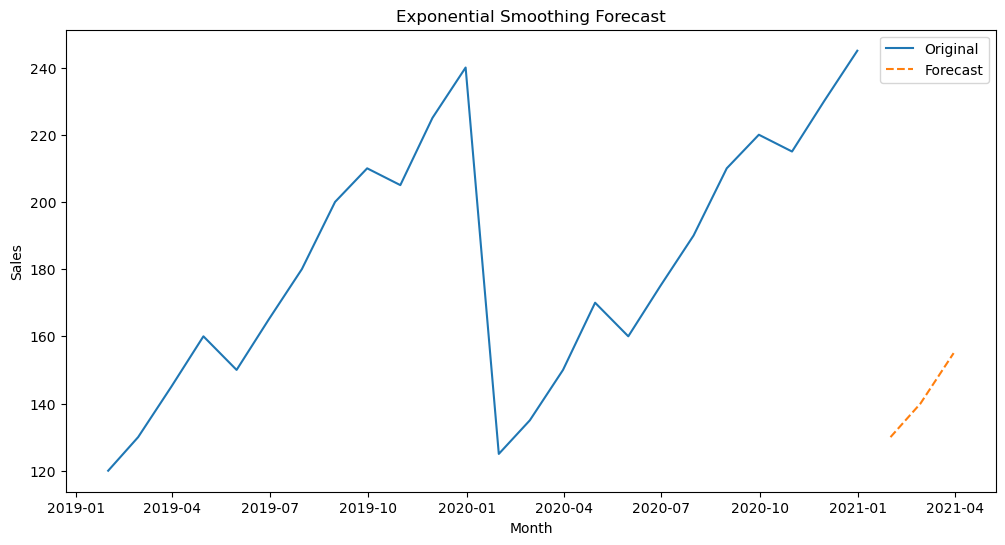

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Hypothetical monthly sales data for two years
data = [120, 130, 145, 160, 150, 165, 180, 200, 210, 205, 225, 240,
        125, 135, 150, 170, 160, 175, 190, 210, 220, 215, 230, 245]

# Convert data to pandas Series with a datetime index
index = pd.date_range(start='2019-01-01', periods=len(data), freq='ME')
series = pd.Series(data, index=index)

# Apply Exponential Smoothing with trend and seasonality
model = ExponentialSmoothing(series, trend='add', seasonal='add', seasonal_periods=12).fit()

# Forecast the next 3 periods
forecast = model.forecast(3)

# Plot the original data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(series, label='Original')
plt.plot(forecast, label='Forecast', linestyle='--')
plt.title('Exponential Smoothing Forecast')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [76]:
!pip install seaborn

# Modify this code for the assignment
## This code provides you with the data pull, moving averages and train/test split

[*********************100%***********************]  1 of 1 completed


-------Raw Data-------
Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2022-01-03  178.645691  179.499620  174.425185  174.542962  104487900
2022-01-04  176.378342  179.558457  175.809061  179.254190   99310400
2022-01-05  171.686691  176.839648  171.411868  176.290001   94537600
2022-01-06  168.820694  172.059699  168.467348  169.507752   96904000
2022-01-07  168.987549  170.921136  167.868622  169.694241   86709100
-------Engineered Data-------
Price        Close        High         Low        Open        Volume  \
Ticker        AAPL        AAPL        AAPL        AAPL          AAPL   
count   520.000000  520.000000  520.000000  520.000000  5.200000e+02   
mean    161.552110  163.209332  159.724208  161.388295  7.337175e+07   
std      17.945381   17.708765   18.226121   18.026875  2.535230e+07   
min     123.421249  126.136

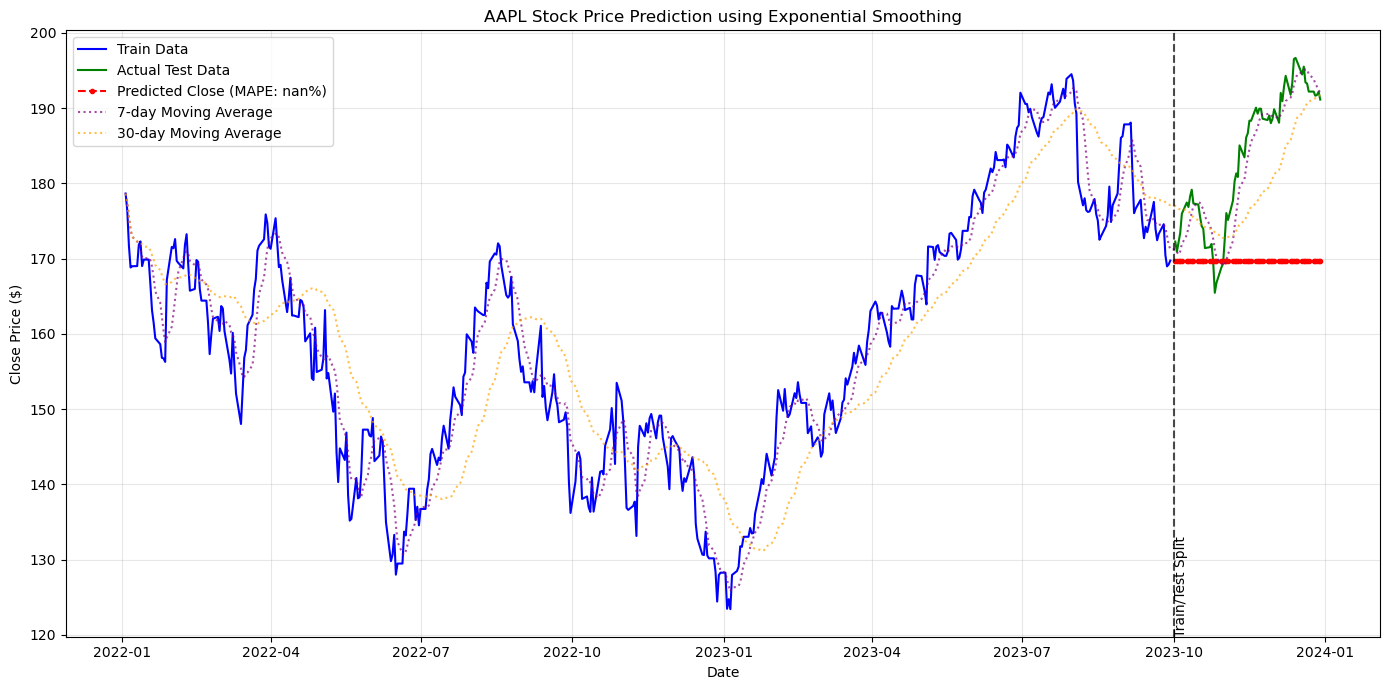

In [25]:
# Import necessary libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
import math

# Data Acquisition
stock_data = yf.download('AAPL', start='2022-01-01', end='2024-01-01')
stock_data.sort_index(ascending=True, inplace=True)

# Ensure proper DatetimeIndex with frequency for time series analysis
stock_data.index = pd.to_datetime(stock_data.index)
stock_data = stock_data.asfreq('B', method='ffill')  # Business days frequency

print('-------Raw Data-------')
print(stock_data.head())

# Calculate rolling averages
stock_data['7_day_avg'] = stock_data['Close'].rolling(window=7, min_periods=1).mean()
stock_data['30_day_avg'] = stock_data['Close'].rolling(window=30, min_periods=1).mean()

print('-------Engineered Data-------')
print(stock_data.describe())

# Split the data into training and test sets
split_date = pd.to_datetime('2023-10-01')
train = stock_data.loc[stock_data.index < split_date].copy()  # Use .copy() to avoid SettingWithCopyWarning
test = stock_data.loc[stock_data.index >= split_date].copy()  # Use .copy() to avoid SettingWithCopyWarning

# Prepare the training data for Exponential Smoothing
y_train = train['Close']

# Try different model configurations for better results
model = ExponentialSmoothing(
    y_train,
    trend='mul',  # Using multiplicative trend instead of additive
    seasonal=None,  # Removing seasonality as daily stock data often doesn't have strong seasonal patterns
    damped_trend=True  # Using damped_trend
).fit(optimized=True)  # Let the model find optimal smoothing parameters

# Predict for the test period
forecast_horizon = len(test)
predictions = model.forecast(forecast_horizon)

# Add predictions to test dataframe using .loc to avoid SettingWithCopyWarning
test.loc[:, 'Predicted_Close'] = predictions.values

# Calculate error metrics
rmse = math.sqrt(mean_squared_error(test['Close'], test['Predicted_Close']))
mape = np.mean(np.abs((test['Close'] - test['Predicted_Close']) / test['Close'])) * 100

print(f"Root Mean Square Error: {rmse:.2f}")
print(f"Mean Absolute Percentage Error: {mape:.2f}%")

# Visualization of Train and Test Datasets with improved predictions
plt.figure(figsize=(14, 7))
plt.plot(train.index, train['Close'], label='Train Data', color='blue')
plt.plot(test.index, test['Close'], label='Actual Test Data', color='green')
plt.plot(test.index, test['Predicted_Close'], label=f'Predicted Close (MAPE: {mape:.2f}%)', 
         linestyle='--', color='red', marker='.')

# Add the rolling averages to the plot for comparison
plt.plot(stock_data.index, stock_data['7_day_avg'], label='7-day Moving Average', 
         linestyle=':', color='purple', alpha=0.7)
plt.plot(stock_data.index, stock_data['30_day_avg'], label='30-day Moving Average', 
         linestyle=':', color='orange', alpha=0.7)

plt.title('AAPL Stock Price Prediction using Exponential Smoothing')
plt.xlabel('Date')
plt.ylabel('Close Price ($)')
plt.legend()
plt.grid(True, alpha=0.3)

# Add vertical line to show train/test split
plt.axvline(x=split_date, color='black', linestyle='--', alpha=0.7)
plt.text(split_date, plt.ylim()[0], 'Train/Test Split', rotation=90, verticalalignment='bottom')

plt.tight_layout()
plt.show()

The projection doesn't seem to work as well as the Linear Regression with smoothed features.  RMSE is much higher, and the prediction doesn't follow the test data as well.
Looking up the Exponential Smoothing model, we find that it is not designed to predict daily fluctuations.  Stock prices often follow a random walk pattern that is difficult to predict with series models.  An ARIMA model might do better.

## Extra Credit Assignment (50 points total)

### Objective
Build an LSTM model to predict the closing prices of Apple Inc. (AAPL) stock and compare it to the models in the core assignment.

### Deliverables and Points Breakdown

1. **LSTM Model Implementation (30 points)**
   - Develop an LSTM model on the given dataset.
   - Ensure proper configuration and parameter tuning.

2. **Model Prediction and Visualization (10 points)**
   - Use the model to predict the test dataset.
   - Visualize the prediction results.

3. **Model Evaluation and Comparative Analysis (10 points)**
   - Evaluate the model using appropriate metrics.
   - Compare with the models from the core assignment and discuss the findings.